In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(filepath):
    df = pd.read_csv(filepath, delimiter='|') 
    return df

df = load_data('C:/Users/nejat/AIM Projects/week3 data/MachineLearningRating_v3.txt')
print(df.head())


C:\Users\nejat\AppData\Local\Temp\ipykernel_14924\2090248432.py:6: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, delimiter='|')


   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...             Mobility - 

In [39]:
print(df.columns)

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')


In [40]:
def data_summarization(df):
    summary = df[['TotalPremium', 'TotalClaims']].describe()

    variability = pd.DataFrame({
        'Standard Deviation': df[['TotalPremium', 'TotalClaims']].std(),
        'Variance': df[['TotalPremium', 'TotalClaims']].var()
    })

    return summary, variability

summary, variability = data_summarization(df)

print("\nDescriptive Statistics:")
print(summary)

print("\nVariability Measures:")
print(variability)

print("\nData Types:")
print(df.dtypes)


Descriptive Statistics:
       TotalPremium   TotalClaims
count  1.000098e+06  1.000098e+06
mean   6.190550e+01  6.486119e+01
std    2.302845e+02  2.384075e+03
min   -7.825768e+02 -1.200241e+04
25%    0.000000e+00  0.000000e+00
50%    2.178333e+00  0.000000e+00
75%    2.192982e+01  0.000000e+00
max    6.528260e+04  3.930921e+05

Variability Measures:
              Standard Deviation      Variance
TotalPremium          230.284513  5.303096e+04
TotalClaims          2384.074695  5.683812e+06

Data Types:
UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                

In [41]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoo

C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


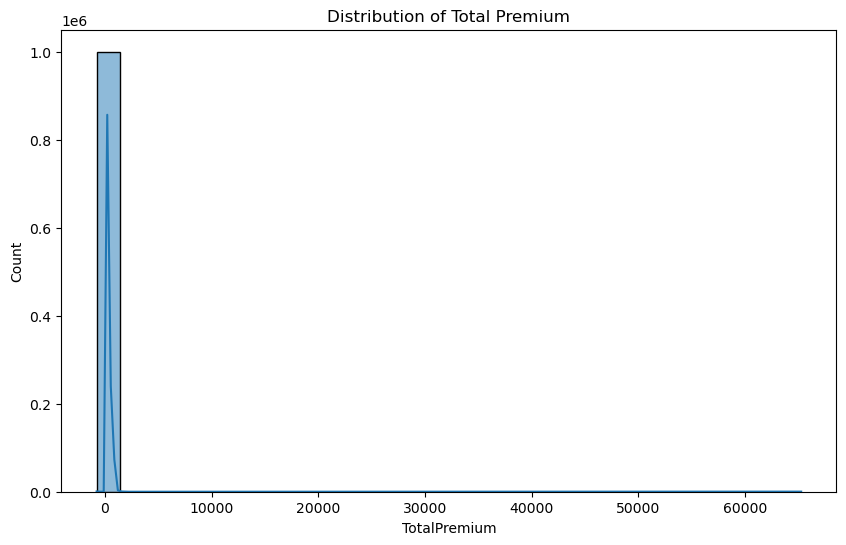

C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


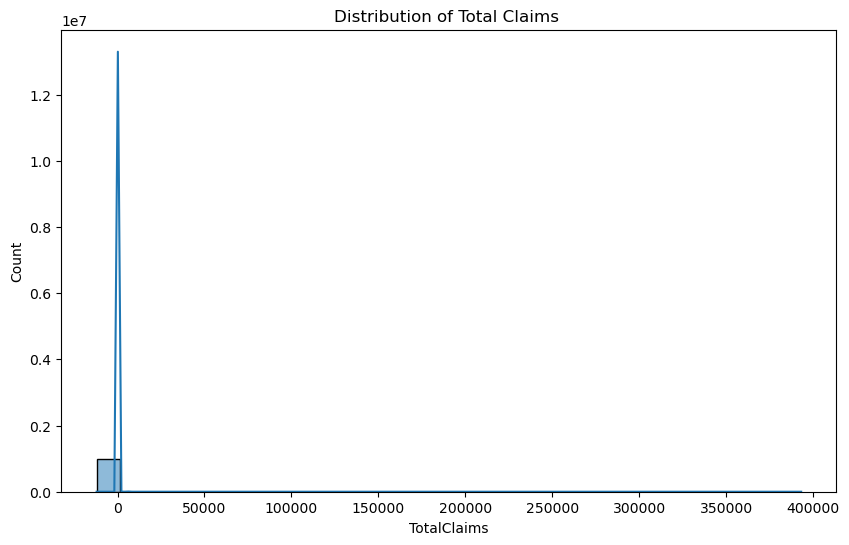

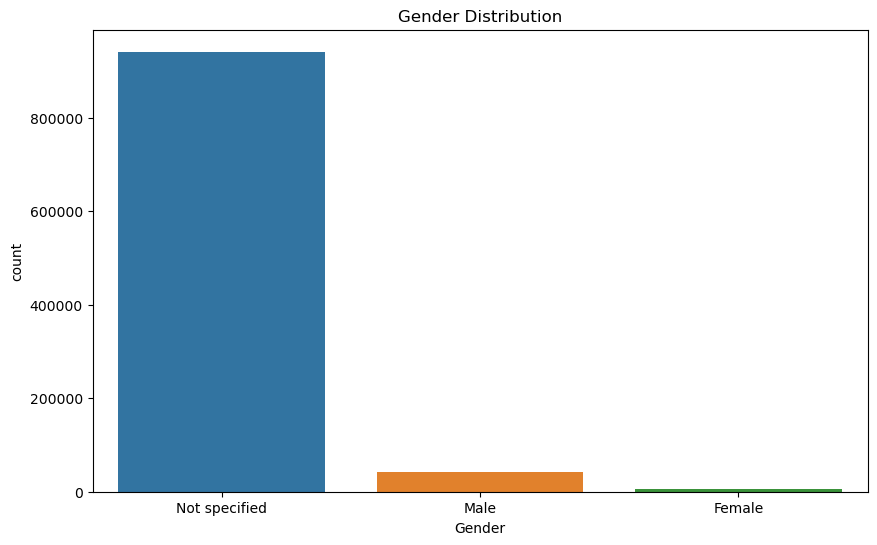

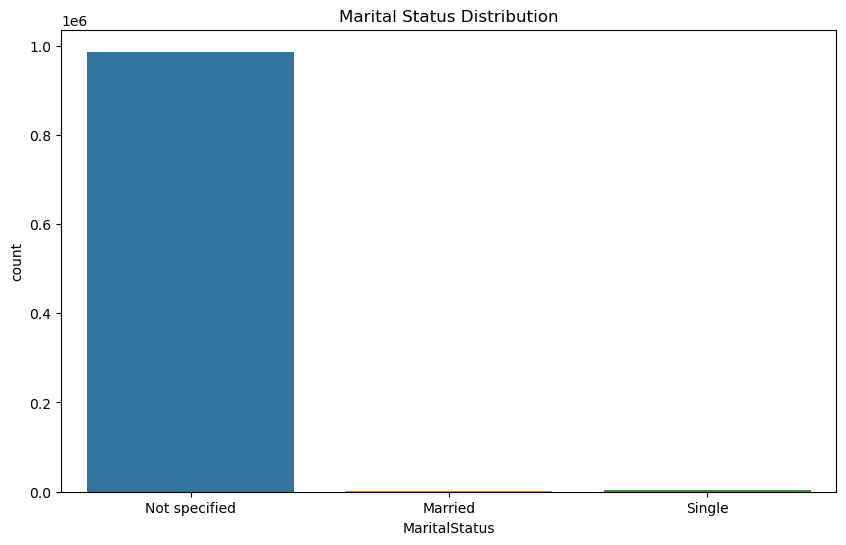

In [42]:
def univariate_analysis(df):
    plt.figure(figsize=(10,6))
    sns.histplot(df['TotalPremium'], bins=30, kde=True)
    plt.title('Distribution of Total Premium')
    plt.show()

    plt.figure(figsize=(10,6))
    sns.histplot(df['TotalClaims'], bins=30, kde=True)
    plt.title('Distribution of Total Claims ')
    plt.show()

    plt.figure(figsize=(10,6))
    sns.countplot(x='Gender', data=df)
    plt.title('Gender Distribution')
    plt.show()

    plt.figure(figsize=(10,6))
    sns.countplot(x='MaritalStatus', data=df)
    plt.title('Marital Status Distribution')
    plt.show()

univariate_analysis(df)

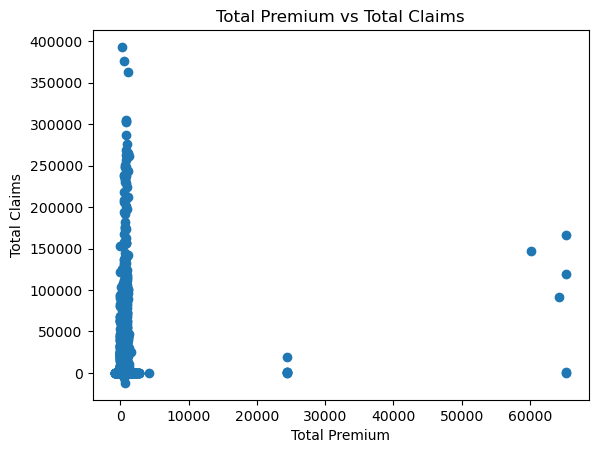

C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


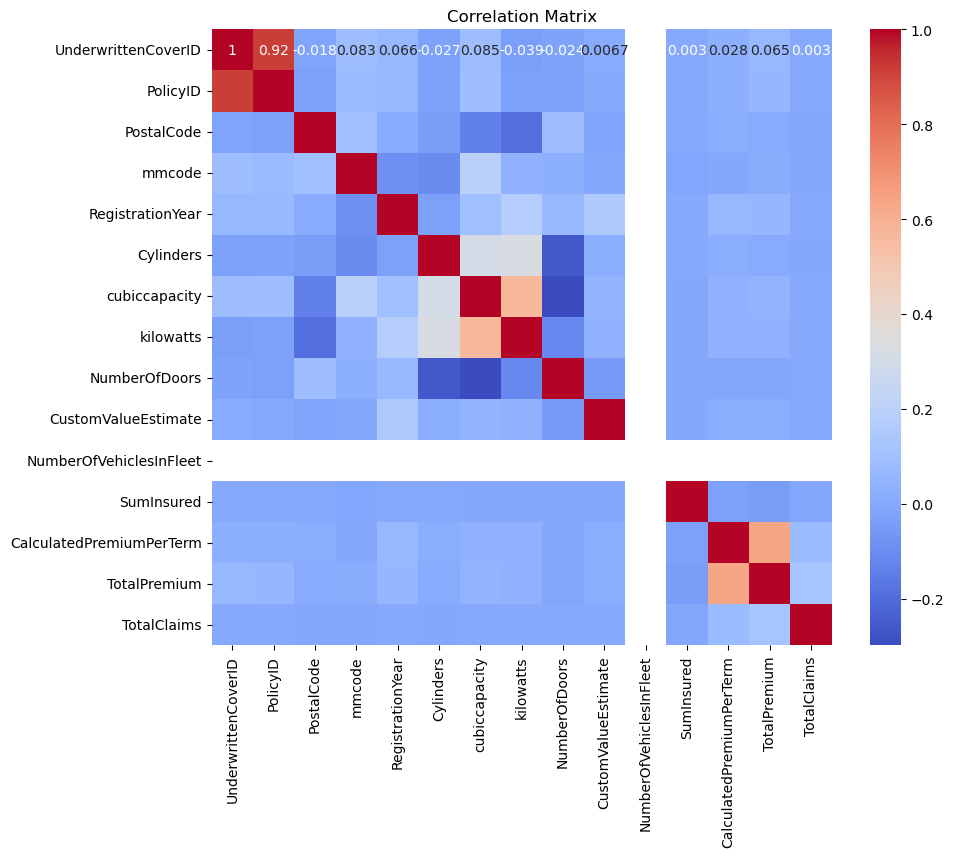

In [43]:
def multivariate_analysis(df):
    plt.scatter(df['TotalPremium'], df['TotalClaims'])
    plt.xlabel('Total Premium')
    plt.ylabel('Total Claims')
    plt.title('Total Premium vs Total Claims')
    plt.show()

    numeric_cols = df.select_dtypes(include=['number']) 
    corr_matrix = numeric_cols.corr()

    plt.figure(figsize=(10,8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

multivariate_analysis(df)

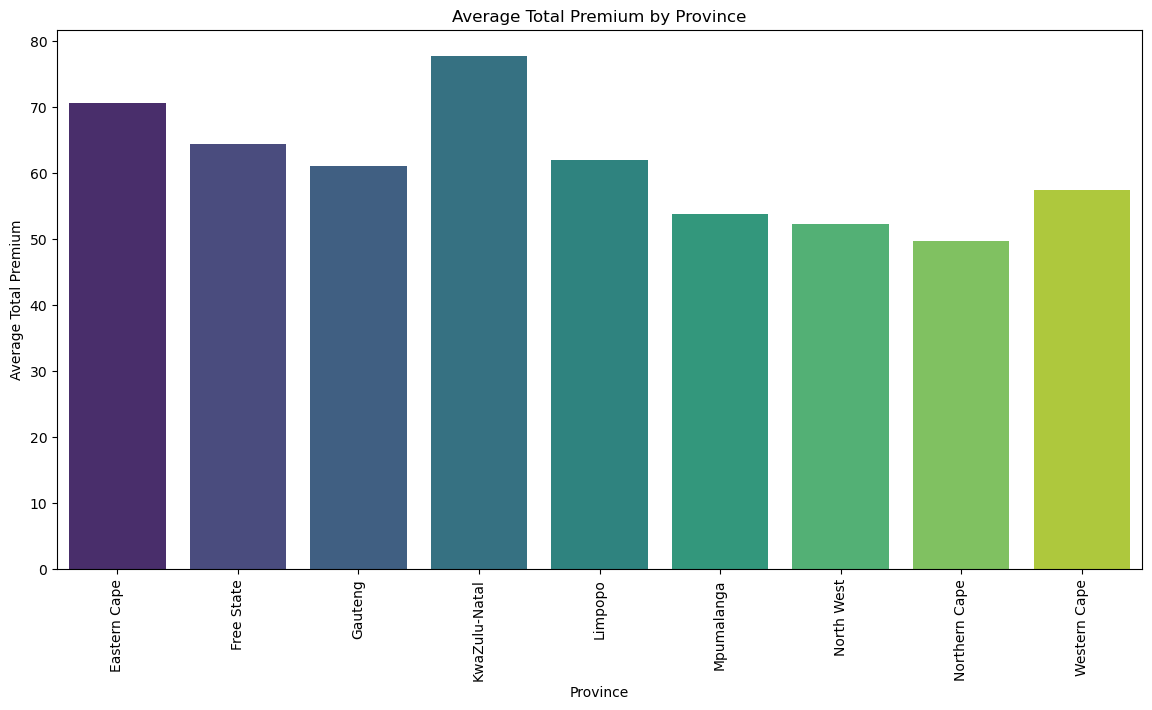

In [44]:
def plot_trends_over_geography(df):
    df_grouped = df.groupby('Province').agg({'TotalPremium': 'mean'}).reset_index()

    plt.figure(figsize=(14, 7))
    sns.barplot(data=df_grouped, x='Province', y='TotalPremium', palette='viridis')
    
    plt.title('Average Total Premium by Province')
    plt.xlabel('Province')
    plt.ylabel('Average Total Premium')
    plt.xticks(rotation=90)
    plt.show()

plot_trends_over_geography(df)


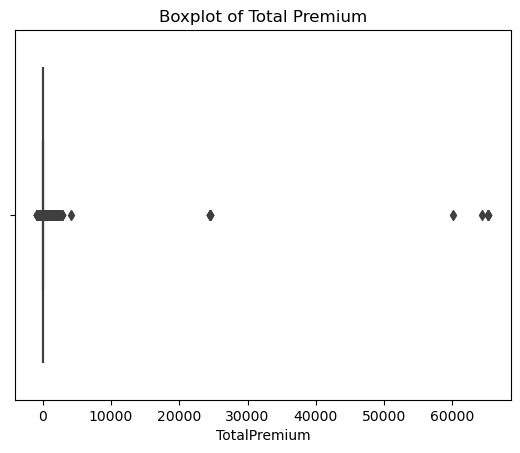

In [45]:
def outlier_detection(df):
    sns.boxplot(x=df['TotalPremium'])
    plt.title('Boxplot of Total Premium')
    plt.show()

outlier_detection(df)

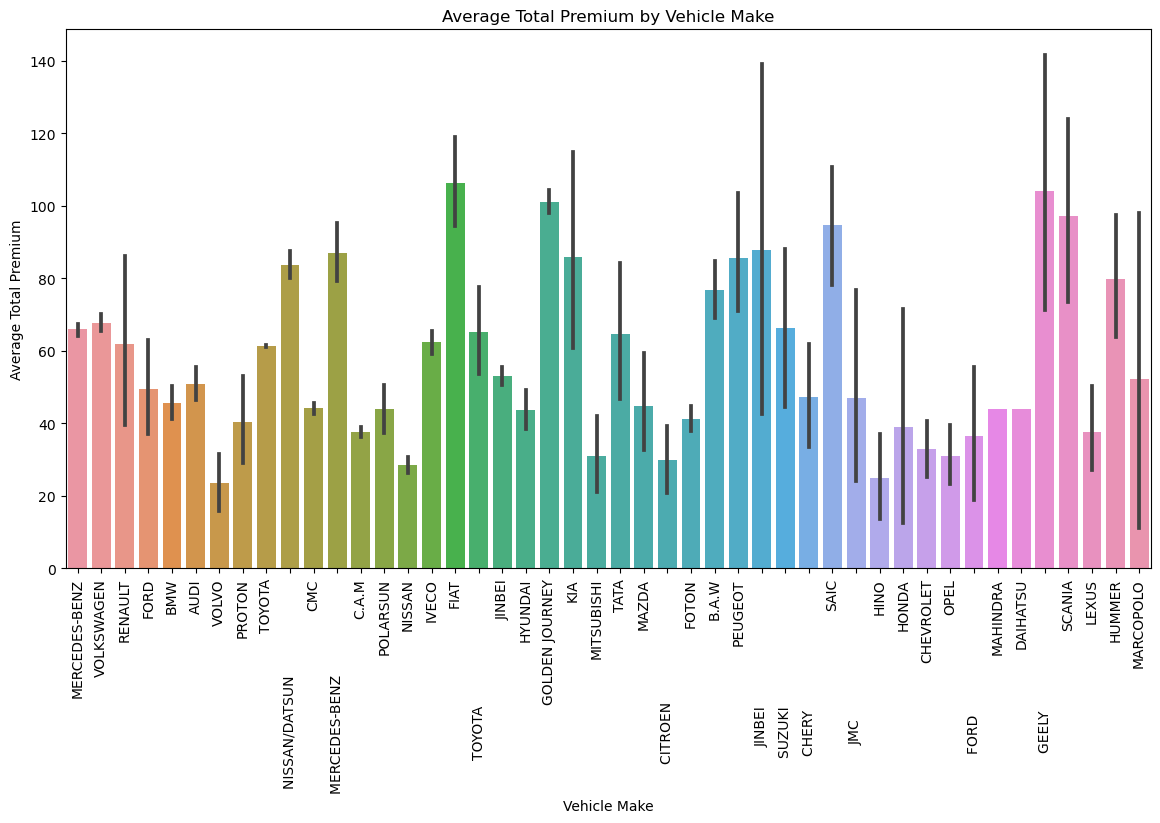

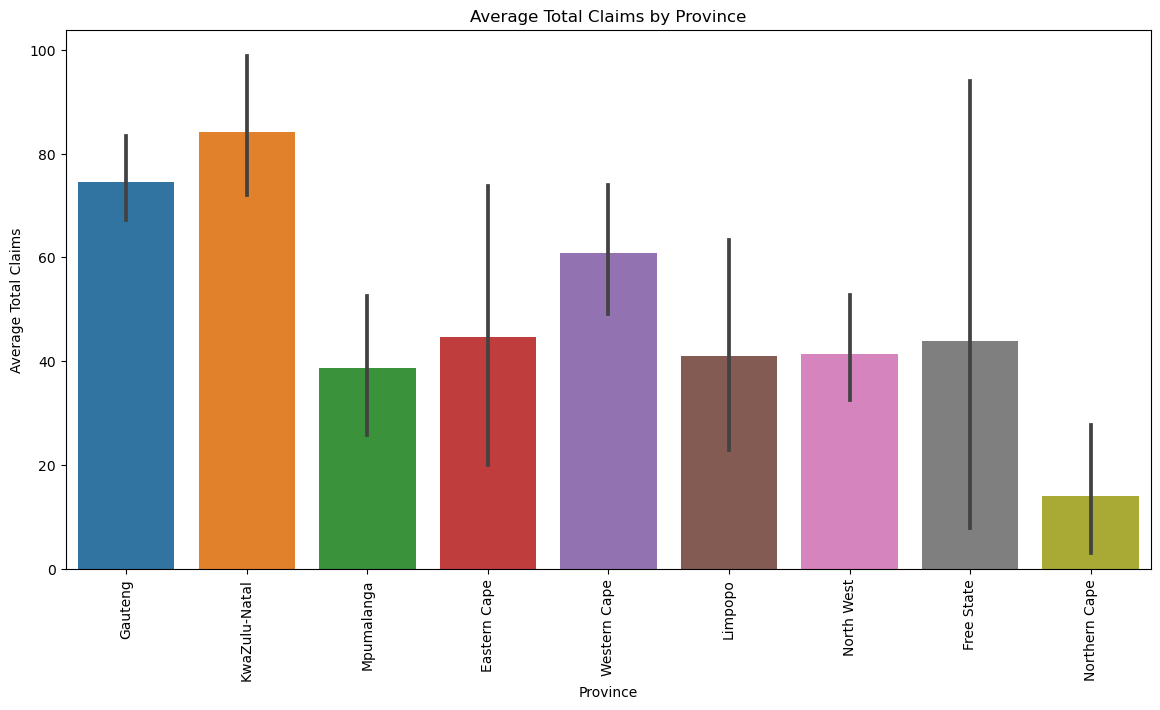

C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

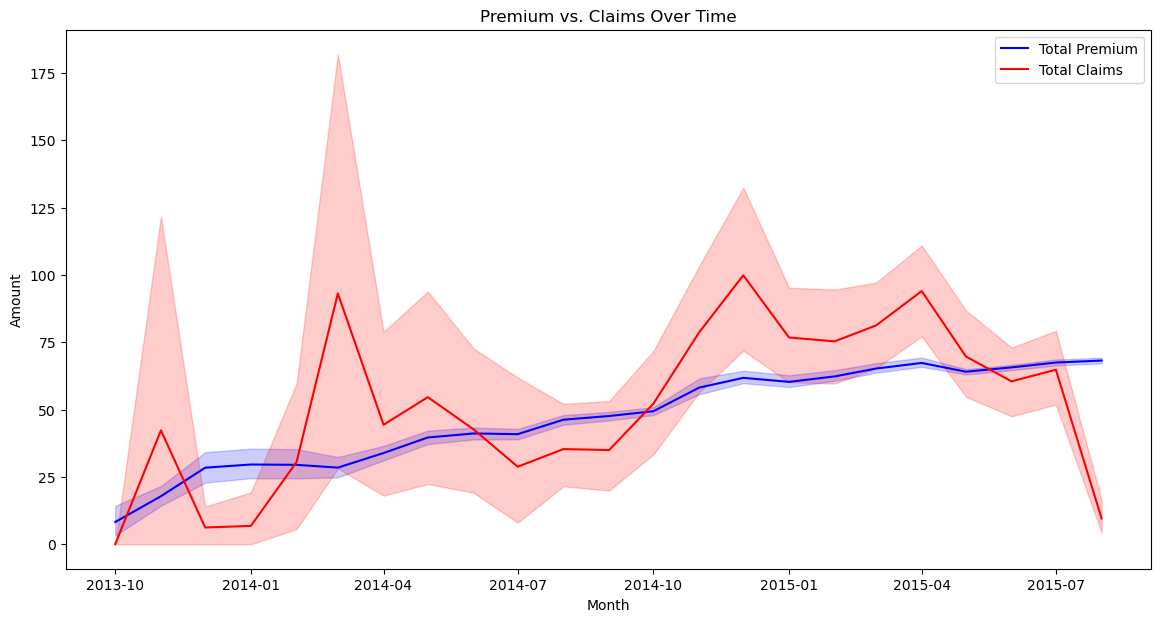

In [46]:
def visualization(df):
    plt.figure(figsize=(14, 7))
    # Bar plot for Total Premium by Vehicle Make
    sns.barplot(data=df, x='make', y='TotalPremium', estimator='mean')
    plt.title('Average Total Premium by Vehicle Make')
    plt.xlabel('Vehicle Make')
    plt.ylabel('Average Total Premium')
    plt.xticks(rotation=90)
    plt.show()

    plt.figure(figsize=(14, 7))
    # Bar plot for Total Claims by Province
    sns.barplot(data=df, x='Province', y='TotalClaims', estimator='mean')
    plt.title('Average Total Claims by Province')
    plt.xlabel('Province')
    plt.ylabel('Average Total Claims')
    plt.xticks(rotation=90)
    plt.show()

    df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')
    plt.figure(figsize=(14, 7))
    # Line plot for Premium and Claims over Time
    sns.lineplot(data=df, x='TransactionMonth', y='TotalPremium', label='Total Premium', color='blue')
    sns.lineplot(data=df, x='TransactionMonth', y='TotalClaims', label='Total Claims', color='red')
    
    plt.title('Premium vs. Claims Over Time')
    plt.xlabel('Month')
    plt.ylabel('Amount')
    plt.legend()
    plt.show()

visualization(df)